# Polymer Properties Neural Networks

**At this point we continue to diverge from the original publciation thus we acknolwege only the dataset**
Data taken from: Estimation and Prediction of the Polymers’ Physical Characteristics Using the Machine Learning Models Polymers 2024, 16(1), 115; https://doi.org/10.3390/polym16010115.

Github repository: https://github.com/catauggie/polymersML/tree/main

## Moving on from traditional ML into NN
The models and techniques described in the previous sections are are not neural networks. Instead, they are examples of traditional machine learning models and techniques used for regression tasks. Here's a brief overview of what was discussed:

1. **Linear Regression**: A simple linear approach to modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
2. **Stacking Regressor**: A model that combines multiple regression models for predictions. The base level models are trained on the full training set, and then a meta-model is trained on the outputs of the base models as features.
3. **Pipeline with Feature Selection and Dimensionality Reduction**: This involves preprocessing steps like selecting the most important features (`SelectKBest`) and reducing the number of dimensions in the data (`PCA`), before applying a final regression model (like `LinearRegression`). This is a method to improve model performance by reducing overfitting or computational complexity.

Neural networks are a different class of models inspired by the structure and function of the brain's neural networks. They are typically used for more complex tasks like image and speech recognition, natural language processing, and deep learning applications where they can automatically and adaptively learn spatial hierarchies of features from data.

The models mentioned above do not involve neural network architecture; they are part of classical machine learning. Neural networks would involve models like:

- **Multilayer Perceptrons (MLP)**: A class of feedforward artificial neural network (ANN).
- **Convolutional Neural Networks (CNNs)**: Mostly used in image recognition and processing.
- **Recurrent Neural Networks (RNNs)** and **Long Short-Term Memory (LSTM)** networks: Primarily used for sequential data such as time series analysis or natural language processing.

Each of these neural network types has its own architecture and is designed to handle specific types of data and tasks more effectively than traditional machine learning models in certain scenarios.


Whether a neural network would provide better results for predicting glass transition temperatures from molecular fingerprints depends on several factors, including the complexity of the data, the amount of available data, and the specific characteristics of the molecular fingerprints. 

**Here's an analysis considering these factors**:

### Complexity of the Data

- **Molecular fingerprints** are typically high-dimensional, sparse datasets that represent the presence or absence of certain molecular substructures or features. Neural networks, especially deep learning models, can be very effective at handling high-dimensional data and automatically discovering intricate patterns that may not be easily captured by traditional machine learning models.
- If the relationship between molecular fingerprints and glass transition temperatures is highly nonlinear and complex, neural networks could potentially offer better performance due to their ability to model complex functions.

### Amount of Available Data

- Neural networks, and deep learning models in particular, usually require large amounts of data to train effectively without overfitting. If a substantial dataset is available, a neural network could be a strong candidate.
- For smaller datasets, traditional machine learning models might perform better, or techniques like data augmentation or transfer learning could be considered to make neural networks viable.

### Specific Characteristics of Molecular Fingerprints

- Neural networks can automatically learn and derive features during the training process, which could be advantageous if the molecular fingerprints require complex feature engineering to reveal underlying patterns related to glass transition temperatures.
- Convolutional Neural Networks (CNNs) or Graph Neural Networks (GNNs) could be particularly useful if the molecular fingerprints can be represented as images or graphs, respectively, leveraging the spatial structure of molecules for prediction.

### Computational Resources and Model Interpretability

- Training neural networks typically requires more computational resources and time than traditional models. This is an important consideration, especially for large datasets or complex models.
- Neural networks are often considered "black box" models, meaning their predictions can be difficult to interpret compared to simpler, traditional models. In scientific fields where understanding the relationship between variables is important, this could be a drawback.

### Conclusion

A neural network could potentially offer better results for predicting glass transition temperatures from molecular fingerprints if the dataset is large and complex enough to warrant its use. However, it's essential to weigh the benefits against the potential drawbacks, such as the need for more data, computational resources, and the complexity of model interpretation.

A practical approach (as we have already taken) would be to start with simpler models to establish a baseline performance and then experiment with more complex neural network models to see if they provide a significant improvement in prediction accuracy. Cross-validation and comparison using a consistent set of metrics would be essential steps in determining the best model for this specific task.

### A shallow or a Deep Network?
Having more than 8,000 fingerprints and glass transition temperature pairs can be considered a reasonably large dataset in the context of machine learning, especially for traditional algorithms. However, whether this amount of data is sufficient for training neural networks effectively depends on several factors:

### Complexity of the Neural Network
- **Simpler Neural Networks:** For simpler architectures, such as shallow neural networks (with a few layers), 8,000 samples might be sufficient to achieve good performance without overfitting, especially if the network's complexity (number of neurons and layers) is kept in check relative to the amount of available data.
- **Deep Neural Networks:** More complex models, including deep neural networks with many layers, typically require more data to train effectively. This is because the increased number of parameters increases the risk of overfitting, where the model learns the training data too closely and performs poorly on unseen data.

### Data Augmentation and Regularization
- **Data Augmentation:** In some cases, techniques such as data augmentation can effectively increase the size of your dataset. While more common in image processing tasks, similar concepts can sometimes be applied to other types of data, including molecular fingerprints, to generate additional training examples.
- **Regularization Techniques:** Techniques such as dropout, L1/L2 regularization, and early stopping can help prevent overfitting, making it possible to train more complex models on datasets of this size.

### Transfer Learning and Pre-trained Models
- **Transfer Learning:** If there are pre-trained models available that have been trained on similar tasks, you can use transfer learning to adapt these models to your specific task. This approach can significantly reduce the amount of data required to achieve high performance.

### Domain-Specific Considerations
- **Molecular Data Specifics:** The complexity and variability of the molecular fingerprints themselves play a crucial role. If the fingerprints capture a wide variety of molecular features and the relationship between these features and glass transition temperatures is complex, more data may be needed to capture all the nuances. Conversely, if the relationships are relatively simple or if there are strong patterns, 8,000 pairs might be sufficient.

### Conclusion
In the context of predicting glass transition temperatures from molecular fingerprints, a dataset of more than 8,000 pairs is a good starting point and may be sufficient for simpler neural network models. For more complex neural network models, careful design, regularization, and possibly augmentation or transfer learning strategies will be key to leveraging this dataset effectively.

Starting with our baseline models we have established performance benchmarks. Now we will begin to experiment with more complex models while closely monitoring for overfitting. Cross-validation and testing with unseen data will be crucial to ensure the model generalizes well to new, unseen examples.

## A short aside for those using Macs with M chips.  
The MX macs have GPU support for both TensorFlow and PyTorch with some tinkering.  You can follow this article for more information:  https://medium.com/bluetuple-ai/how-to-enable-gpu-support-for-tensorflow-or-pytorch-on-macos-4aaaad057e74

However the easiest method using TensorFlow is to install Apple Metal Addon for TensorFlow `pip install tensorflow-metal` you can then verify its installation with the following script.

In [1]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [2]:
# Go ahead and import the data into a dataframe and then make sure its imported properly by listing the first few lines
import pandas as pd
new_df = pd.read_excel('Tg_Data_Frame.xlsx')
new_df.head(3)

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_1015,col_1016,col_1017,col_1018,col_1019,col_1020,col_1021,col_1022,col_1023,Glass transition temperature_value_median
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-60.00
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.39
2,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-24.05


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error


In [4]:
# Function Definitions
def evaluate_model_performance(y_test, y_pred):
    """
    Evaluate the performance of a model using various metrics.
    
    Parameters:
    - y_test: array-like of shape (n_samples,) or (n_samples, n_outputs), 
              True values for X.
    - y_pred: array-like of shape (n_samples,) or (n_samples, n_outputs),
              Estimated target values.
    """
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    variance_score = explained_variance_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.3f}')
    print(f'R-squared: {r2:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')
    print(f'Explained Variance Score: {variance_score:.3f}')
    print(f'Median Absolute Error: {medae:.3f}')

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# evaluate_model_performance(y_test, y_pred)


def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot the actual vs. predicted values to evaluate a model's performance.
    
    Parameters:
    - y_test: array-like, True values.
    - y_pred: array-like, Predicted values.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability

    # Scatter plot for actual vs. predicted values
    plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')

    # Ideal line for perfect predictions
    max_val = max(max(y_test), max(y_pred))  # Find the maximum value for setting plot limits
    min_val = min(min(y_test), min(y_pred))  # Find the minimum value for setting plot limits
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Fit')

    # Customization and labels
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Model Predictions vs. Actual Data')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# plot_actual_vs_predicted(y_test, y_pred)

def bland_altman_plot(y_test, y_pred):
    """
    Generate a Bland-Altman plot to assess the agreement between two sets of measurements.
    
    Parameters:
    - y_test: array-like, true values.
    - y_pred: array-like, predicted values.
    """
    avg = (y_test + y_pred) / 2
    diff = y_test - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(avg, diff, alpha=0.5)
    plt.axhline(y=np.mean(diff), color='r', linestyle='--', label='Mean Difference')
    plt.axhline(y=np.mean(diff) + 1.96 * np.std(diff), color='g', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(y=np.mean(diff) - 1.96 * np.std(diff), color='g', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Average of Actual and Predicted Values')
    plt.ylabel('Difference Between Actual and Predicted Values')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.show()

# Example usage:
# y_test = [actual values]
# y_pred = [predicted values]
# bland_altman_plot(y_test, y_pred)

    

In [5]:
# X and y data 
cols = [c for c in new_df.columns if 'col' in c]
X = new_df[cols]
y = new_df['Glass transition temperature_value_median']

## Multilayer Perceptrons (MLP): A class of feedforward artificial neural network (ANN).
MLPs are a class of feedforward artificial neural networks (ANN) that consist of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node, except for the input nodes, uses a nonlinear activation function. MLPs are well-suited for tabular data, classification problems, and regression problems like predicting glass transition temperatures from molecular fingerprints.

**Why MLP for Molecular Fingerprints?**
Feature Representation: Molecular fingerprints are typically represented as vectors of binary values (0s and 1s), indicating the absence or presence of certain molecular features. MLPs are effective at learning from this type of high-dimensional, structured data.
Non-sequential Data: Unlike RNNs and LSTMs, which excel at sequential or time-series data, MLPs are ideal for datasets where there is no intrinsic order in the data points, such as molecular fingerprints.
**Non-spatial Data:** CNNs are powerful for spatial data where local patterns (e.g., in images) are crucial. Molecular fingerprints, represented as flat vectors without spatial relationships, don't necessitate the convolutional layers that are the hallmark of CNNs.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's important to scale the features because neural networks are sensitive to input scale
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test) 

In [7]:
# Define a shallow neural network architecture
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),  # Input layer, adjust the shape according to your data
    Dense(32, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
    Dense(16, activation='relu'),  # Second hidden layer with 32 neurons and ReLU activation
    Dense(1)  # Output layer, single neuron for regression output
])

# Compile the model
model.compile(optimizer='adam',  # Optimizer
              loss='mean_squared_error',  # Loss function for regression
              metrics=['mean_absolute_error'])  # Evaluation metric

# Train the model
history = model.fit(X_train, y_train_scaled, 
                    validation_split=0.2,  # Use part of the training data for validation
                    epochs=35,  # Number of training epochs
                    batch_size=32)  # Batch size for training

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Epoch 1/35


2024-02-23 15:29:47.644517: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-23 15:29:47.644539: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-23 15:29:47.644545: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-23 15:29:47.644598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-23 15:29:47.644614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 10/162 [>.............................] - ETA: 0s - loss: 0.6257 - mean_absolute_error: 0.6303 

2024-02-23 15:29:48.000087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 1s 7ms/step - loss: 0.3404 - mean_absolute_error: 0.4428 - val_loss: 0.2664 - val_mean_absolute_error: 0.3885
Epoch 2/35
162/162 [==============================] - 1s 6ms/step - loss: 0.2181 - mean_absolute_error: 0.3493 - val_loss: 0.2375 - val_mean_absolute_error: 0.3625
Epoch 3/35
162/162 [==============================] - 1s 6ms/step - loss: 0.1919 - mean_absolute_error: 0.3264 - val_loss: 0.2447 - val_mean_absolute_error: 0.3707
Epoch 4/35
162/162 [==============================] - 1s 6ms/step - loss: 0.1831 - mean_absolute_error: 0.3206 - val_loss: 0.2211 - val_mean_absolute_error: 0.3464
Epoch 5/35
162/162 [==============================] - 1s 6ms/step - loss: 0.1700 - mean_absolute_error: 0.3054 - val_loss: 0.2247 - val_mean_absolute_error: 0.3504
Epoch 6/35
162/162 [==============================] - 1s 6ms/step - loss: 0.1709 - mean_absolute_error: 0.3066 - val_loss: 0.2277 - val_mean_absolute_error: 0.3599
Epoch 7/35
162/162 [=======

In [8]:
predictions = model.predict(X_test)
predictions = predictions.ravel()
predictions

51/51 [==============================] - 0s 2ms/step


array([-0.892944  , -1.0152127 ,  0.11490282, ..., -0.946838  ,
       -0.28724638, -0.8551785 ], dtype=float32)

In [9]:
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real

array([[ 47.61089 ],
       [ 34.08662 ],
       [159.08994 ],
       ...,
       [ 41.649616],
       [114.607765],
       [ 51.788174]], dtype=float32)

In [10]:
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)


Mean Squared Error: 6252.899
R-squared: 0.491
Mean Absolute Error: 62.980
Explained Variance Score: 0.619
Median Absolute Error: 53.131


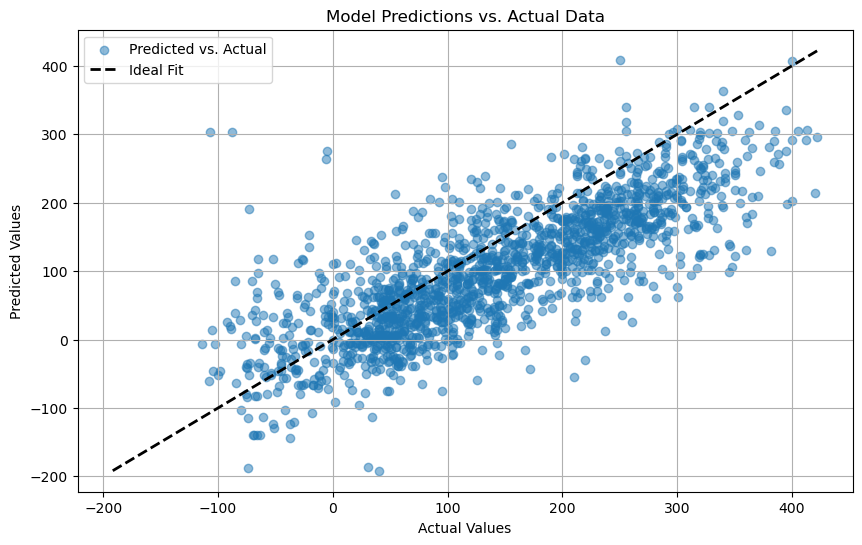

In [11]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)


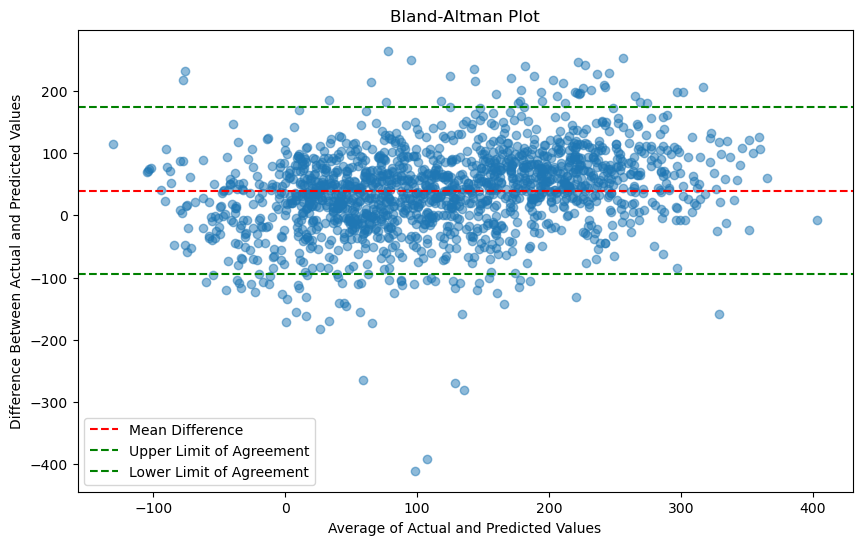

In [12]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [13]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [14]:
predictions = model.predict(X_test)
predictions = predictions.ravel()

51/51 [==============================] - 0s 3ms/step


In [15]:
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real

array([[186.78601],
       [ 94.21641],
       [158.87224],
       ...,
       [234.6037 ],
       [204.40257],
       [161.97392]], dtype=float32)

In [16]:
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

Mean Squared Error: 3103.635
R-squared: 0.747
Mean Absolute Error: 42.299
Explained Variance Score: 0.748
Median Absolute Error: 33.363


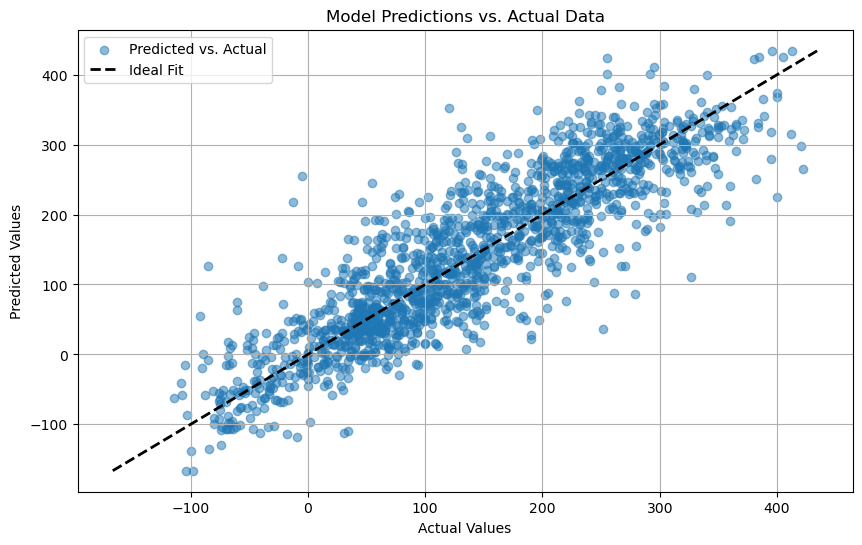

In [17]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)


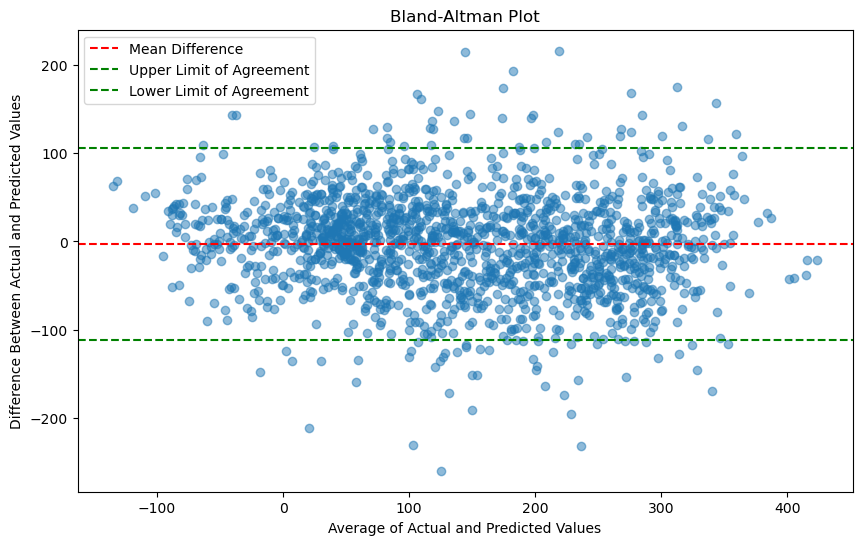

In [18]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [19]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Define initial learning rate
initial_learning_rate = 0.01

# Set up a learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Use this learning rate schedule in the optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [20]:
predictions = model.predict(X_test)
predictions = predictions.ravel()

51/51 [==============================] - 0s 3ms/step


In [21]:
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real

array([[130.88942],
       [ 79.87652],
       [193.65126],
       ...,
       [152.86607],
       [232.13373],
       [158.6656 ]], dtype=float32)

In [22]:
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

Mean Squared Error: 2876.062
R-squared: 0.766
Mean Absolute Error: 40.449
Explained Variance Score: 0.769
Median Absolute Error: 31.314


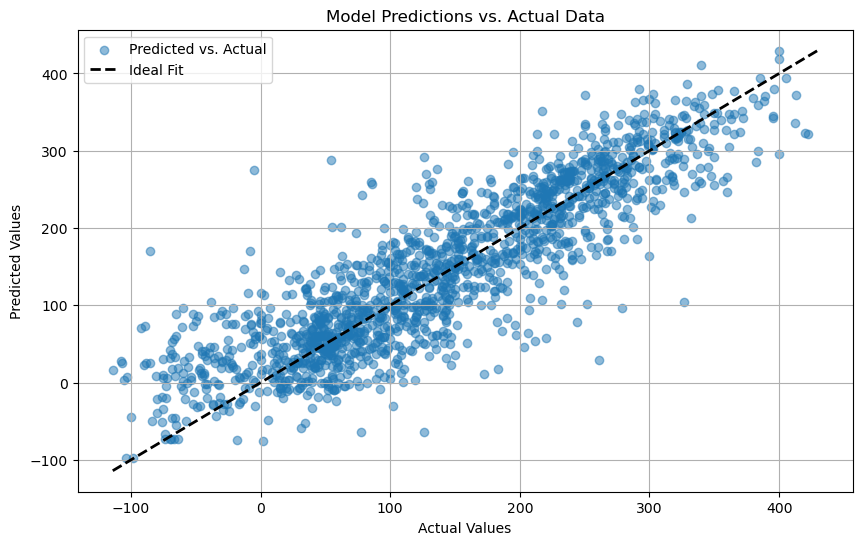

In [23]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

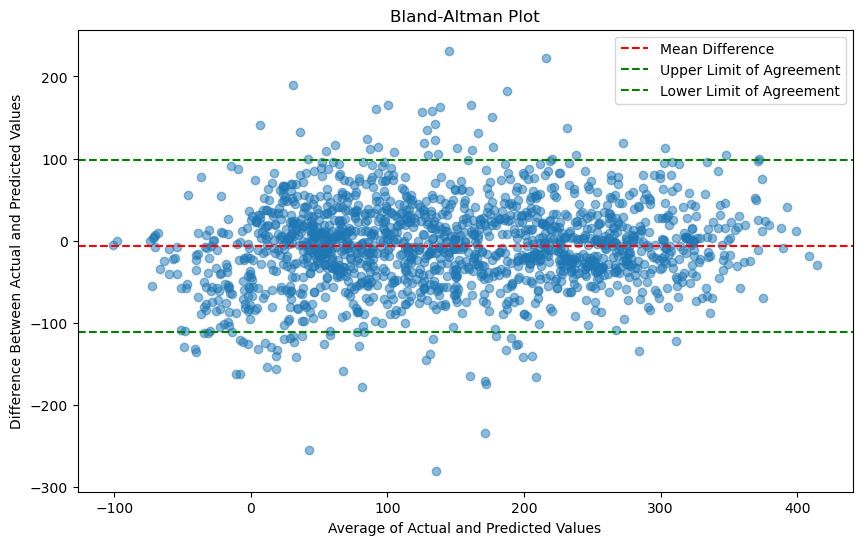

In [24]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [25]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Define initial learning rate
initial_learning_rate = 0.01

# Use this learning rate schedule in the optimizer
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                65600     
                                                                 
 batch_normalization_6 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)              

In [26]:
predictions = model.predict(X_test)
predictions = predictions.ravel()

51/51 [==============================] - 0s 3ms/step


In [27]:
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real

array([[155.74942 ],
       [ 60.720585],
       [140.96165 ],
       ...,
       [164.0021  ],
       [195.16907 ],
       [139.53215 ]], dtype=float32)

In [28]:
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

Mean Squared Error: 2710.305
R-squared: 0.779
Mean Absolute Error: 39.435
Explained Variance Score: 0.795
Median Absolute Error: 30.853


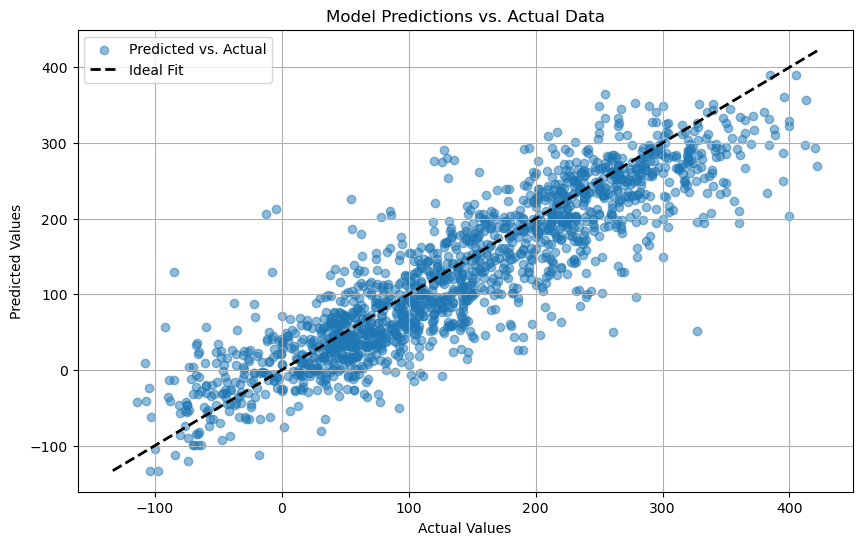

In [29]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

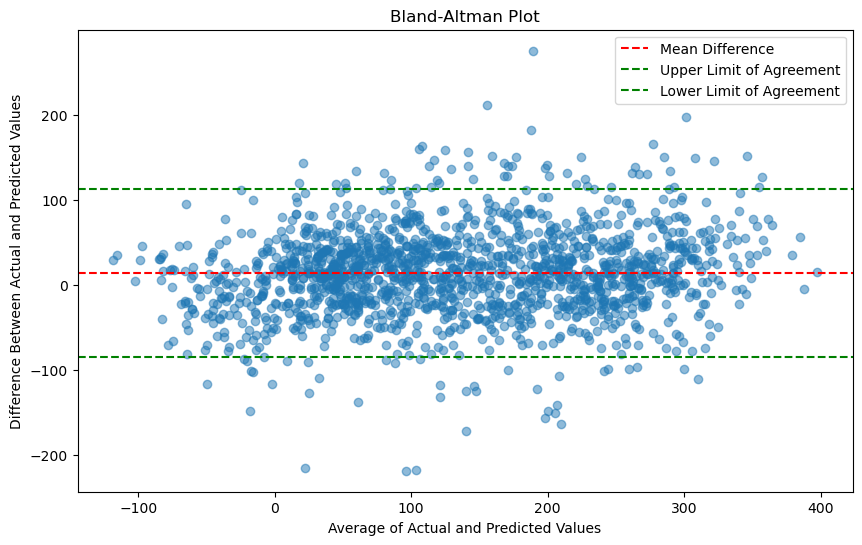

In [30]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [31]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Define initial learning rate
initial_learning_rate = 0.01

# Use this learning rate schedule in the optimizer
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                65600     
                                                                 
 batch_normalization_9 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 128)              

In [32]:
predictions = model.predict(X_test)
predictions = predictions.ravel()

51/51 [==============================] - 0s 4ms/step


In [33]:
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real

array([[143.9646 ],
       [ 93.19088],
       [163.37561],
       ...,
       [206.22444],
       [191.22935],
       [167.11179]], dtype=float32)

In [34]:
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

Mean Squared Error: 2475.288
R-squared: 0.798
Mean Absolute Error: 36.913
Explained Variance Score: 0.799
Median Absolute Error: 28.537


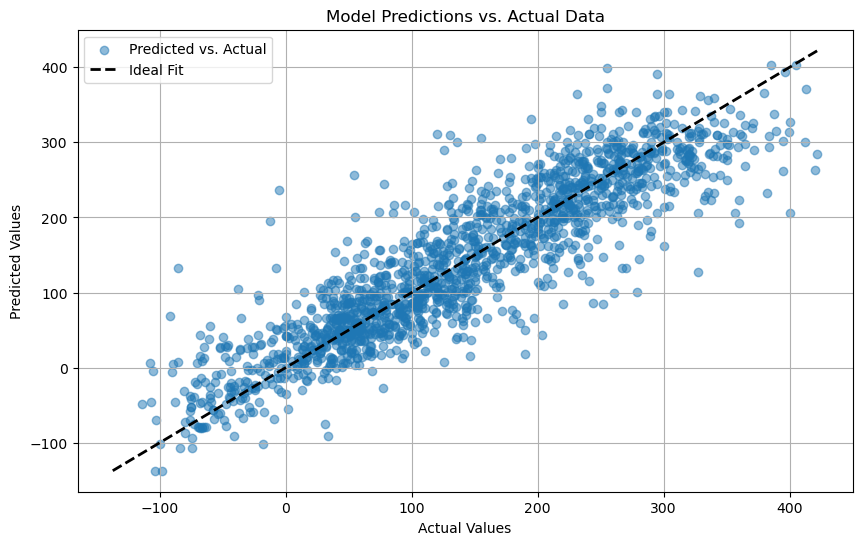

In [35]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

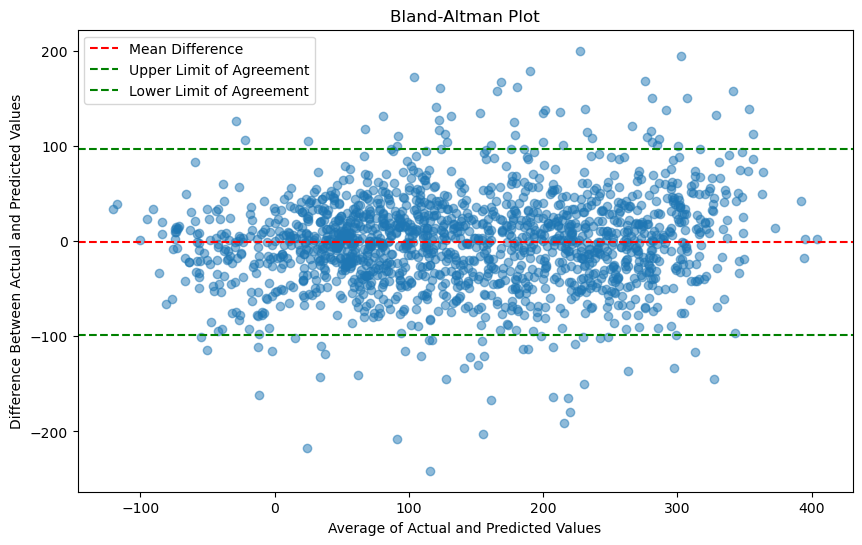

In [36]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [37]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Define initial learning rate
initial_learning_rate = 0.01

# Use this learning rate schedule in the optimizer
optimizer = tf.keras.optimizers.legacy.Adagrad(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                65600     
                                                                 
 batch_normalization_12 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 128)              

In [38]:
predictions = model.predict(X_test)
predictions = predictions.ravel()
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

51/51 [==============================] - 0s 4ms/step
Mean Squared Error: 2614.659
R-squared: 0.787
Mean Absolute Error: 38.649
Explained Variance Score: 0.788
Median Absolute Error: 30.217


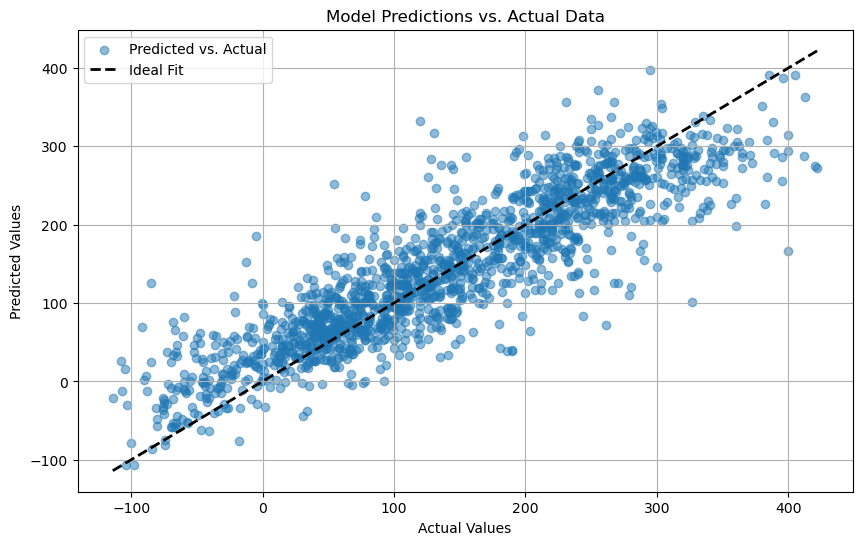

In [39]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

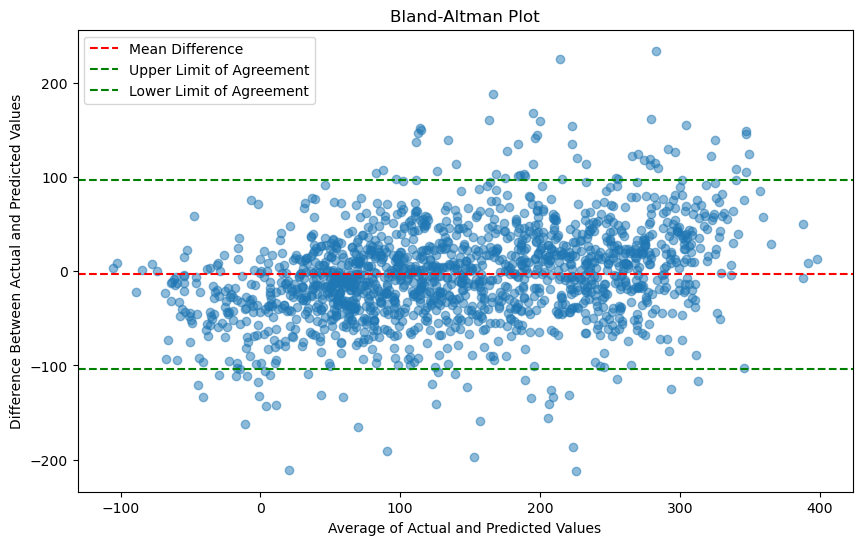

In [40]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [41]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.1),  # Adjust dropout rate as needed, here it's set to 10%
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the dense layer
    Dropout(0.2),  # Adjust dropout rate as needed
    
    Dense(1, activation='linear')  # Output layer for regression
])

# Define initial learning rate
initial_learning_rate = 0.01

# Use this learning rate schedule in the optimizer
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002) # Legacy errors out

# Compile the model
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model to see the architecture
model.summary()

# Train the model
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                65600     
                                                                 
 batch_normalization_15 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 128)              

In [1]:
predictions = model.predict(X_test)
predictions = predictions.ravel()
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

NameError: name 'model' is not defined

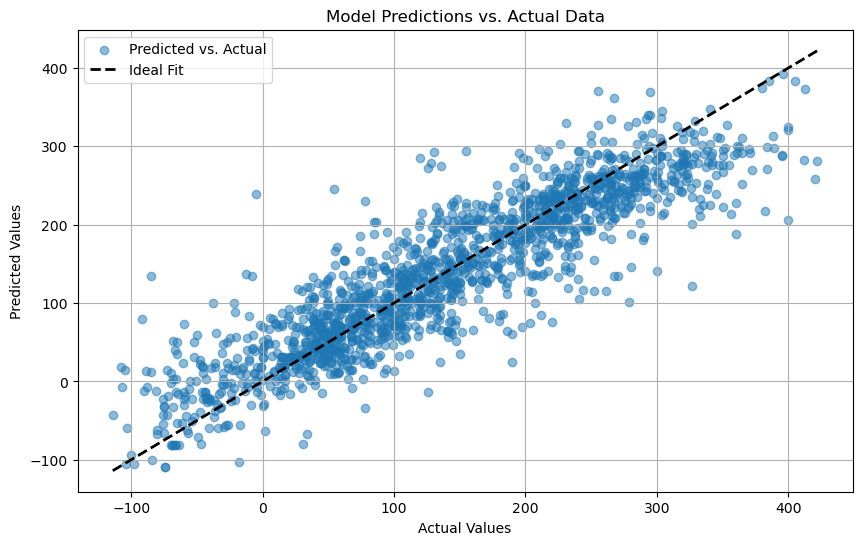

In [43]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

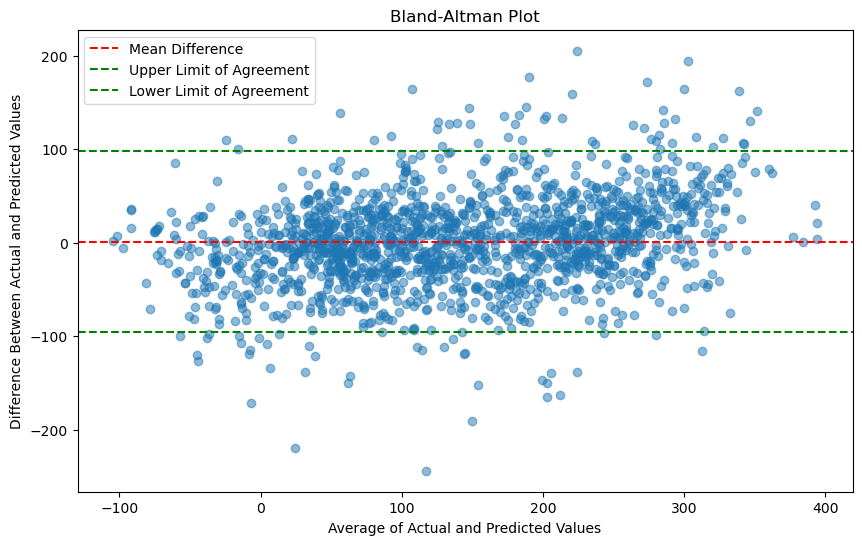

In [44]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)

In [45]:
# Updated model architecture
model = Sequential([
    Dense(128, input_dim=X_train.shape[1]),  # Increased the number of neurons
    LeakyReLU(alpha=0.01),  # Using LeakyReLU to avoid dead neurons
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256),  # Increased layer size and depth
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='linear')
])

# Adjust initial learning rate
initial_learning_rate = 0.001  # Lowered to start with a more conservative approach

# Use a learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Updated optimizer with learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model with the new optimizer and learning rate schedule
model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Add early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, mode='min', verbose=1)

# Summary of the model to see the updated architecture
model.summary()

# Train the model with callbacks
model.fit(X_train, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test_scaled)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               131200    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                      

2024-02-23 15:36:08.615895: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


162/162 [==============================] - 5s 23ms/step - loss: 0.9402 - mean_absolute_error: 0.7500 - val_loss: 0.5898 - val_mean_absolute_error: 0.6288 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 3s 17ms/step - loss: 0.4023 - mean_absolute_error: 0.4942 - val_loss: 0.2920 - val_mean_absolute_error: 0.4202 - lr: 0.0010
Epoch 3/100
162/162 [==============================] - 3s 17ms/step - loss: 0.2604 - mean_absolute_error: 0.3957 - val_loss: 0.2071 - val_mean_absolute_error: 0.3429 - lr: 0.0010
Epoch 4/100
162/162 [==============================] - 3s 16ms/step - loss: 0.2117 - mean_absolute_error: 0.3566 - val_loss: 0.1892 - val_mean_absolute_error: 0.3274 - lr: 0.0010
Epoch 5/100
162/162 [==============================] - 3s 16ms/step - loss: 0.1774 - mean_absolute_error: 0.3268 - val_loss: 0.1678 - val_mean_absolute_error: 0.3058 - lr: 0.0010
Epoch 6/100
162/162 [==============================] - 3s 16ms/step - loss: 0.1486 - mean_absolute_error: 0.2988 - va

In [46]:
predictions = model.predict(X_test)
predictions = predictions.ravel()
y_pred_real = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred_real
# Assuming you've already made predictions with your model
evaluate_model_performance(y_test, y_pred_real)

51/51 [==============================] - 0s 5ms/step
Mean Squared Error: 1576.674
R-squared: 0.872
Mean Absolute Error: 27.715
Explained Variance Score: 0.872
Median Absolute Error: 19.268


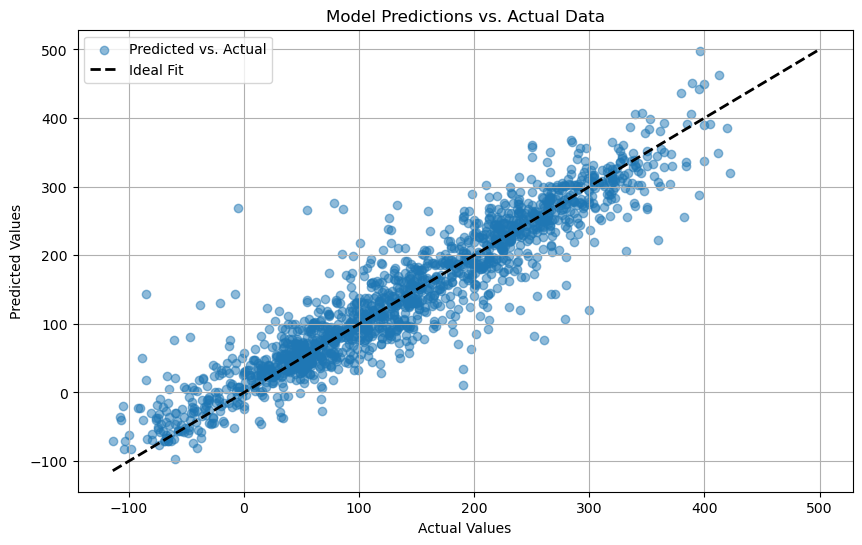

In [47]:
# Visualize the actual vs. predicted values
plot_actual_vs_predicted(y_test, y_pred_real)

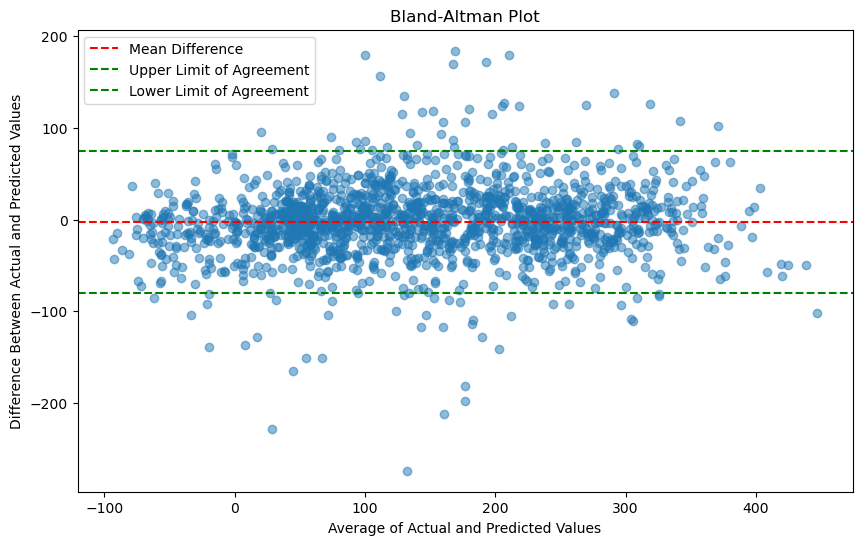

In [48]:
# Generate a Bland-Altman plot
bland_altman_plot(y_test, y_pred_real)